In [1]:
import torchio
import numpy as np
import matplotlib.pyplot as plt

from dataset import EarthMantleDataset
from dataset import read_cdf

In [2]:
file_path = 'D:/EarthMantleConvection/mantle01/spherical001.nc'
x_volume, y_volume, volume_size = read_cdf(file_path, 27, 27, 27, './scalers')
dataset = EarthMantleDataset(x_volume, y_volume, volume_size)

In [3]:
def plot_surfaces(surfaces, channel, start_depth):
    max_depth = 12
    fig = plt.figure(figsize=(16, 16))
    
    x_range = surfaces.shape[2]
    y_range = surfaces.shape[3]
    x = np.linspace(0, x_range, x_range)
    y = np.linspace(0, y_range, y_range)
    
    X, Y = np.meshgrid(x, y)
    # print(X.shape)
    # print(Y.shape)
    
    for i in range(max_depth):
        ax = fig.add_subplot(max_depth//4, 4, i+1, projection='3d')
        ax.plot_surface(X.T, Y.T, surfaces[channel, start_depth+i, :, :], alpha=1)
    fig.tight_layout()
    plt.show()

In [4]:
transform = torchio.Compose([
    torchio.RandomNoise(mean=0.0, std=(0, 0.1)),
    torchio.RandomFlip((1, 2)),
    torchio.RandomBlur((0, 1))
])

In [5]:
x, y, idx = dataset[9987898]
print(x.shape)
print(y.shape)
print(idx)

torch.Size([7, 27, 27, 27])
torch.Size([27])
(167, 37, 71)


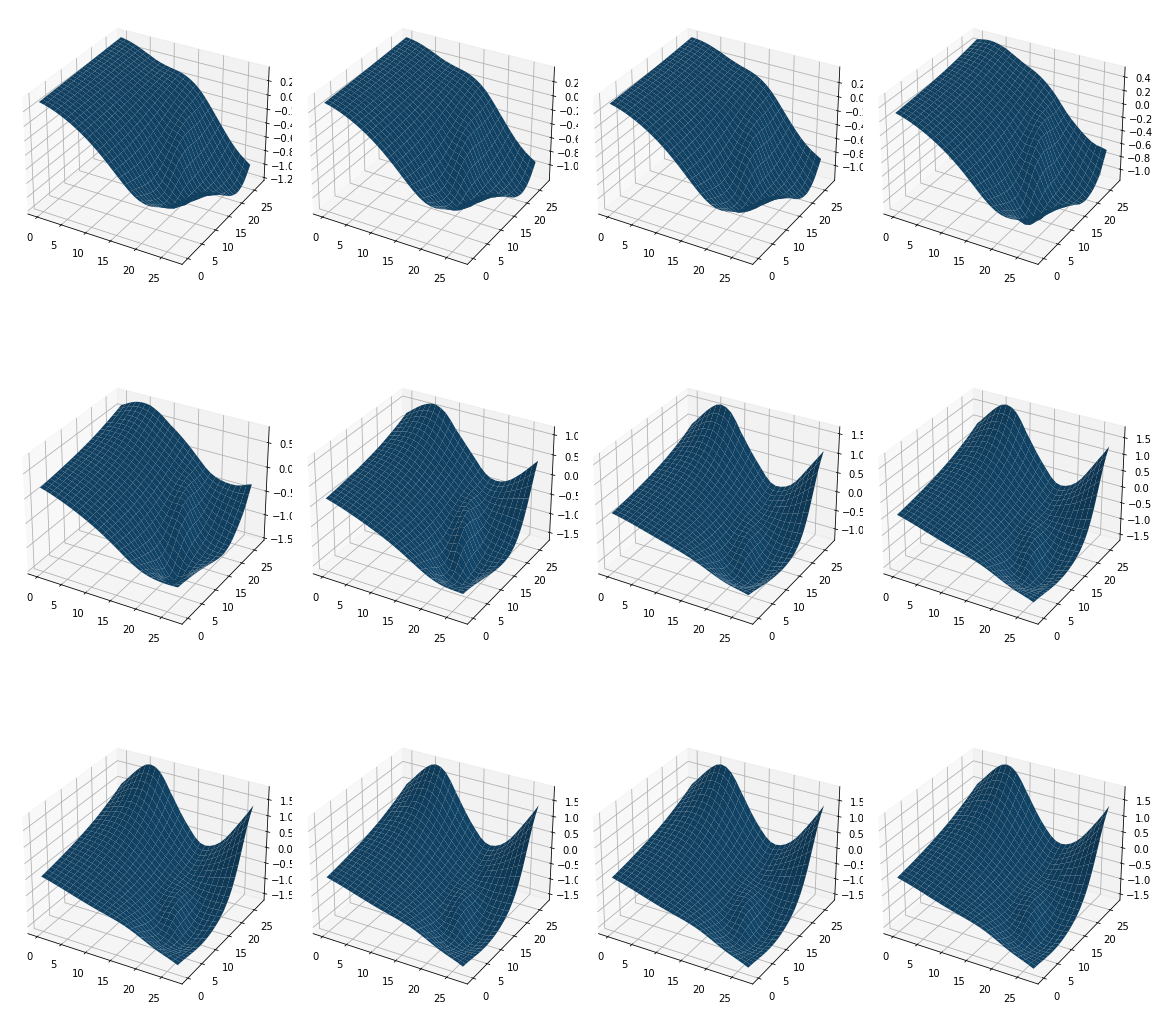

In [6]:
plot_surfaces(x, 0, 10)

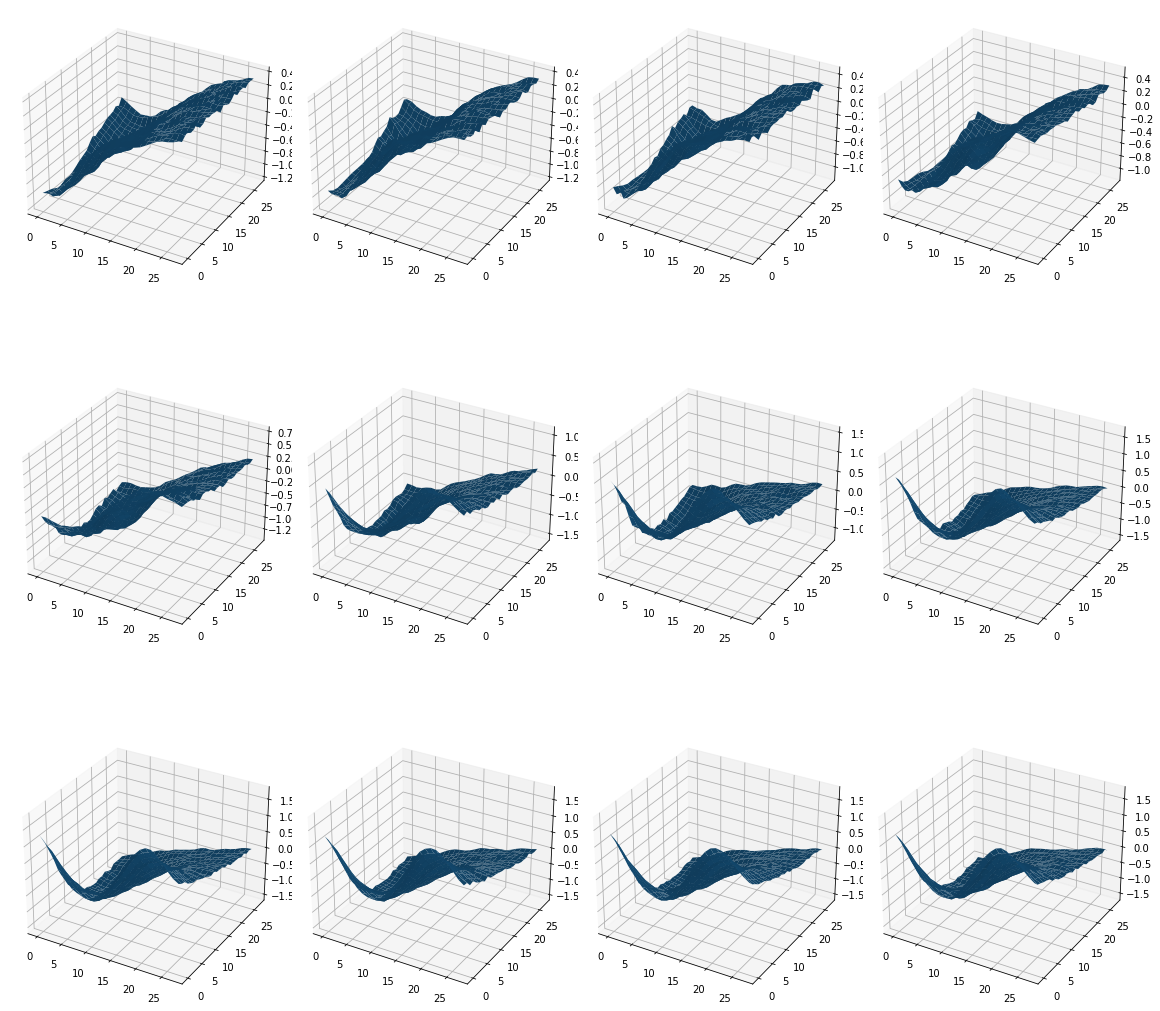

In [7]:
plot_surfaces(transform(x), 0, 10)